# SAMueL-2 full production analysis

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from utils.data_process import DataProcess
from utils.descriptive_stats import DescriptiveStatistics
from utils.pathway import Pathway
from utils.reporting import GlobalReport
from utils.thrombolysis_choice_model import ThrombolysisChoiceModel


## Create data for models

See 'data' folder for processing of raw data.

In [2]:
process_new_data = True

if process_new_data:
    data_processor = DataProcess(year_min=2016, year_max=2019)
    data_processor.create_ml_data()
    data_processor.calculate_paramters_for_pathway_simulation()

All rows: 233501, ML rows:87918, Fraction: 0.38


## Descriptive statistics

In [3]:
ds = DescriptiveStatistics(year_min=2019)
ds.run()

## Thrombolysis decision model

Accuracy: 0.846
Balanced accuracy: 0.817
ROC AUC: 0.915
Actual thrombolysis: 0.303
Predicted thrombolysis: 0.301


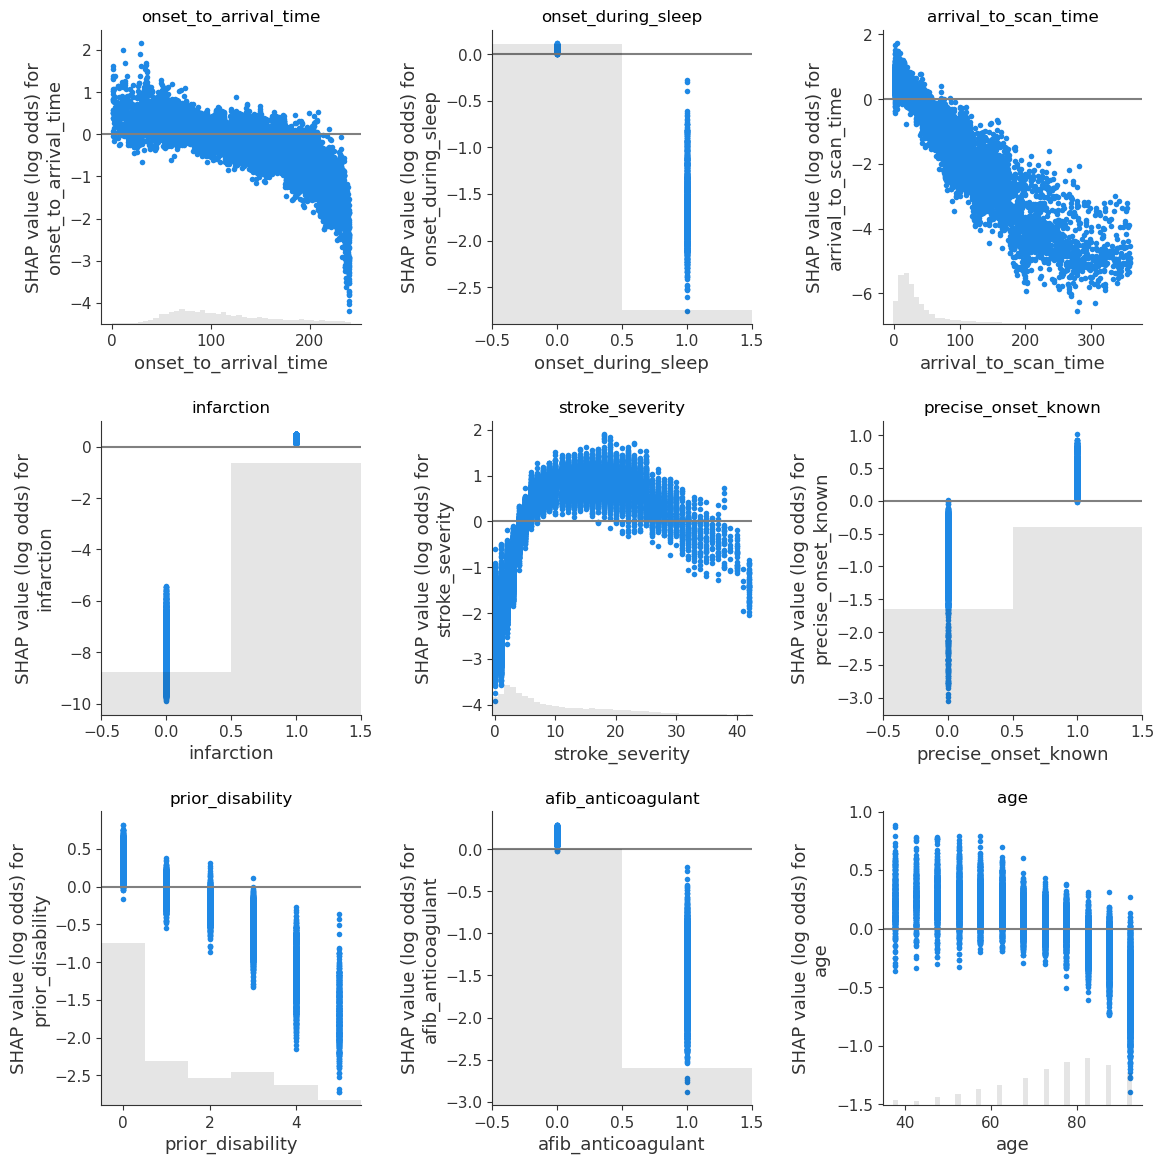

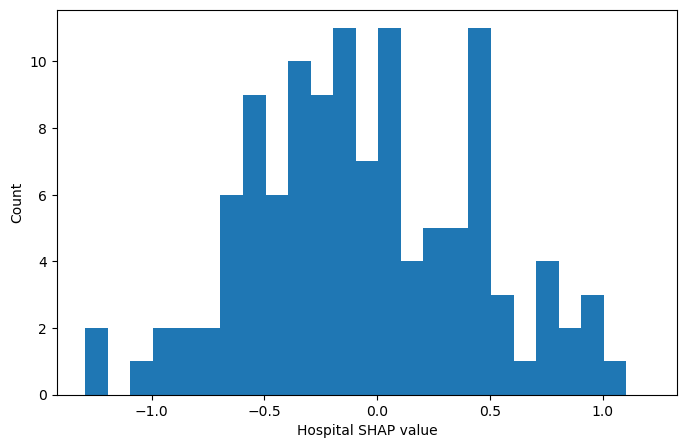

In [4]:
thrombolysis_choice_model = ThrombolysisChoiceModel()
thrombolysis_choice_model.run()

## Pathway model

In [5]:
# Initialize pathway simulation with base case parameters
pathway = Pathway(
    data_processor.pathway_simulation_parameters,
    thrombolysis_choice_model.benchmark_thrombolysis,
    trials=25)
pathway.run()
pathway.sim_results.to_csv('./output/pathway_simulation_results.csv', index=False)   

In [6]:
pathway.sim_results.groupby('scenario').mean().T

scenario,base,benchmark,onset,onset_benchmark,speed,speed_benchmark,speed_onset,speed_onset_benchmark
Baseline_good_outcomes_(median),257.918390,257.842966,257.741864,260.012288,257.434746,257.384831,257.731864,261.101186
Baseline_good_outcomes_per_1000_patients_(low_5%),224.681356,224.649915,223.586949,223.729492,223.716525,223.643983,223.286949,224.164661
Baseline_good_outcomes_per_1000_patients_(high_95%),295.508305,295.104492,296.772203,296.760678,296.553559,297.310000,297.665000,299.237627
Baseline_good_outcomes_per_1000_patients_(mean),259.122542,259.359746,259.019407,260.170678,258.599831,258.919153,259.074661,261.442203
Baseline_good_outcomes_per_1000_patients_(stdev),24.300085,24.138475,24.814661,24.613475,24.577881,24.698390,24.857881,25.330847
Baseline_good_outcomes_per_1000_patients_(95ci),4.763051,4.730847,4.863729,4.824068,4.817627,4.841356,4.871864,4.964407
Percent_Thrombolysis_(median%),11.637373,14.332966,13.861695,16.953136,12.481271,15.132881,14.642373,18.023729
Percent_Thrombolysis_(low_5%),9.076949,11.351356,11.133644,13.905678,9.815424,12.077034,11.588390,14.914746
Percent_Thrombolysis_(high_95%),14.485763,17.519407,16.982034,20.359322,15.193305,18.453814,17.863390,21.166525
Percent_Thrombolysis_(mean),11.761695,14.388051,13.880339,16.961186,12.433220,15.209237,14.537458,17.964407


## Reporting

In [7]:
report = GlobalReport()
report.create_report()